In [1]:
import pandas as pd

df = pd.read_csv('loansData.csv')
df.sample(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
7565,12000,12000.0,9.88%,36 months,educational,5.16%,OH,MORTGAGE,3333.33,755-759,7.0,1117.0,3.0,3 years
87287,12000,12000.0,6.62%,36 months,debt_consolidation,12.36%,NY,RENT,4416.67,765-769,12.0,4117.0,1.0,3 years
61703,10000,10000.0,17.77%,36 months,wedding,30.40%,NY,OWN,2500.00,665-669,5.0,8379.0,0.0,8 years
33269,2400,2400.0,16.77%,36 months,other,17%,WA,RENT,2700.00,690-694,3.0,3418.0,1.0,3 years
10721,9000,9000.0,7.88%,60 months,other,8%,MN,MORTGAGE,4750.00,800-804,14.0,5348.0,0.0,10+ years


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 293.0+ KB


There seems to be nulls in the following columns:
Monthly.Income
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months
Employment.Length

In [3]:
df.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5585.750000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10962.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18888.750000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [4]:
#The max of monthly income has a max that is very high when compared to the mean, should be remove
df = df[df['Monthly.Income'] < 100000]

#Clean data
df['Interest.Rate'] = df['Interest.Rate'].str.strip('%').astype(float)
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].str.strip('%').astype(float)
df['Loan.Length'] = df['Loan.Length'].str.strip(' months')
df['FICO_lower'], df['FICO_upper'] = df['FICO.Range'].str.split('-', 1).str
df = df.dropna()

#Get mid of upper and lower FICO limits
df['FICO_mid'] = (df['FICO_lower'].astype(int)+df['FICO_upper'].astype(int))/2
df = df.drop(columns=['FICO_lower', 'FICO_upper', 'FICO.Range'])
df.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO_mid
81174,20000,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,< 1 year,737.0
99592,19200,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2 years,717.0
80059,35000,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2 years,692.0
15825,10000,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5 years,697.0
33182,12000,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9 years,697.0


In [5]:
df.to_csv('loans_data_cleaned.csv')

In [6]:
from matplotlib import pyplot as plt
plt.figure()
fico = df['FICO_mid']
p = fico.hist()

Uneven distribution, something must be causing skew

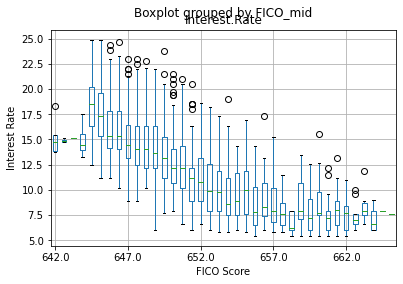

In [7]:
p = df.boxplot('Interest.Rate','FICO_mid')
plt.locator_params(axis='x', nbins=5)

q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate')

Higher FICO score generally leads to a lower interest rate.
However, not singular rate for each FICO range, therefore other factors must come into play in terms of the interest rates offered.

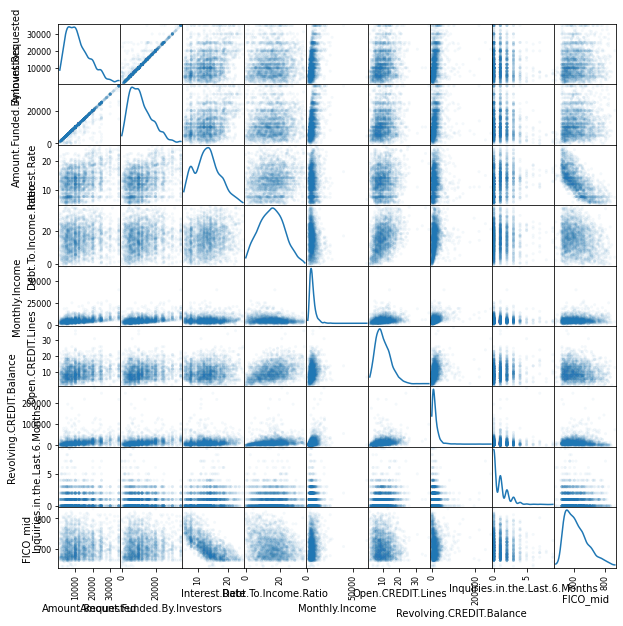

In [10]:
a = pd.plotting.scatter_matrix(df, alpha = 0.05, figsize=(10,10), diagonal='kde')

In [16]:
import statsmodels.formula.api as smf

df = df.rename(columns={'Interest.Rate': 'interest_rate', 'Amount.Requested': 'loan_amount'})

#create fitted model using ordinary least squares
result = smf.ols(formula = 'interest_rate ~ FICO_mid + loan_amount', data=df).fit()
result.params

Intercept      72.972786
FICO_mid       -0.088326
loan_amount     0.000210
dtype: float64

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2283.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:48:46   Log-Likelihood:                -5598.1
No. Observations:                2420   AIC:                         1.120e+04
Df Residuals:                    2417   BIC:                         1.122e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      72.9728      1.011     72.205      0.000      70.991      74.955
FICO_mid       -0.0883      0.001    -61.711      0.000      -0.091      -0.086
loan_amount     0.0002   6.43e-06     32.735      0.000       0.000       0.000
==============================================================================
Omnibus:                       64.568   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.118
Skew:                           0.370   Prob(JB):                     2.19e-16
Kurtosis:                       3.410   Cond. No.                     2.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""